# Name : Reshma Kadam
# Roll No. : 53
# 


In [106]:

import numpy as np
import pandas as pd


from numpy.linalg import inv      # linalg = linear algebra, inv = inverse (used to find inverse of a matrix)

import os
from numpy import random
import scipy
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import t
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import  proportions_ztest

from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from statsmodels.miscmodels.ordinal_model import OrderedModel

from statsmodels.discrete.discrete_model import Poisson as psn
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report


from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier



os.chdir(r'C:\Coding\6b. Statistics')

In [107]:
df = pd.read_csv("cloud_optimizer.csv")
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,vm_02315,2025-06-29 00:59:11,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,io,medium,running
1,vm_00023,2025-06-29 00:15:47,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,network,medium,running
2,vm_01349,2025-06-29 00:45:56,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,compute,medium,running
3,vm_02412,2025-06-29 00:35:09,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,compute,medium,running
4,vm_03907,2025-06-29 01:03:48,53.851100,31.755124,NaN,132.854074,209.353003,5472,249.427367,0.105,io,low,running


In [102]:
df.shape

(305000, 13)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305000 entries, 0 to 304999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vm_id              305000 non-null  object 
 1   timestamp          305000 non-null  object 
 2   cpu_usage          301956 non-null  float64
 3   memory_usage       305000 non-null  float64
 4   disk_io            289732 non-null  float64
 5   network_traffic    305000 non-null  float64
 6   power_consumption  305000 non-null  float64
 7   num_instructions   305000 non-null  int64  
 8   execution_time     305000 non-null  float64
 9   energy_efficiency  305000 non-null  float64
 10  task_type          298901 non-null  object 
 11  task_priority      301950 non-null  object 
 12  task_status        305000 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 30.3+ MB


In [111]:
df.task_status.unique()

array(['completed', 'running', 'waiting'], dtype=object)

In [110]:
# Step 2: Pick 20% of total rows to become 'completed'
num_completed = int(0.20 * len(df))

# Randomly sample from current running and waiting
eligible_idx = df[df['task_status'].isin(['running', 'waiting'])].sample(n=num_completed, random_state=42).index

# Assign those rows to 'completed'
df.loc[eligible_idx, 'task_status']='completed'

# Data Cleaning

In [112]:
# dropping the vm_id and timestamp columns

df = df.drop(['vm_id', 'timestamp'], axis = 1)

In [113]:
# after dropping the vm_id and timestamp columns

df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,io,medium,completed
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,network,medium,running
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,compute,medium,running
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,compute,medium,running
4,53.851100,31.755124,NaN,132.854074,209.353003,5472,249.427367,0.105,io,low,running


In [114]:
# no of missing values in each columns

df.isnull().sum()

cpu_usage             3044
memory_usage             0
disk_io              15268
network_traffic          0
power_consumption        0
num_instructions         0
execution_time           0
energy_efficiency        0
task_type             6099
task_priority         3050
task_status              0
dtype: int64

In [115]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print(cat_cols)
print(num_cols)

['task_type', 'task_priority', 'task_status']
['cpu_usage', 'memory_usage', 'disk_io', 'network_traffic', 'power_consumption', 'num_instructions', 'execution_time', 'energy_efficiency']


In [116]:
medians = []
for col in num_cols:
    medians.append(df[col].median())
    
print(medians)
    

[np.float64(49.99921829638764), np.float64(59.93466691058711), np.float64(50.04067743948835), np.float64(199.9153516898339), np.float64(219.77827830571704), np.float64(5506.0), np.float64(250.1374777282), np.float64(0.101)]


In [117]:
for i, col in enumerate(num_cols):
    df[col] = df[col].fillna(medians[i])

In [118]:
modes = []
for col in cat_cols:
    modes.append(df[col].mode().iloc[0])
    
print(modes)

['compute', 'medium', 'running']


In [119]:
for i, col in enumerate(cat_cols):
    df[col] = df[col].fillna(modes[i])

In [120]:
df.isnull().sum()

cpu_usage            0
memory_usage         0
disk_io              0
network_traffic      0
power_consumption    0
num_instructions     0
execution_time       0
energy_efficiency    0
task_type            0
task_priority        0
task_status          0
dtype: int64

Removed all the null vallues from all columns

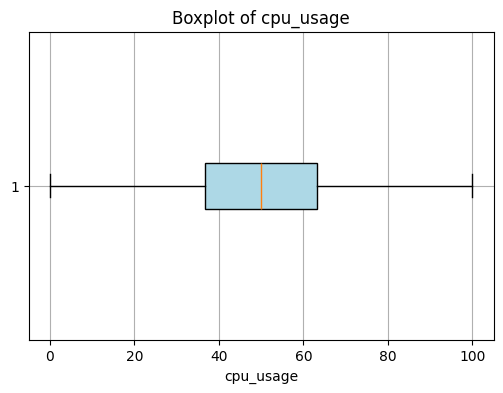

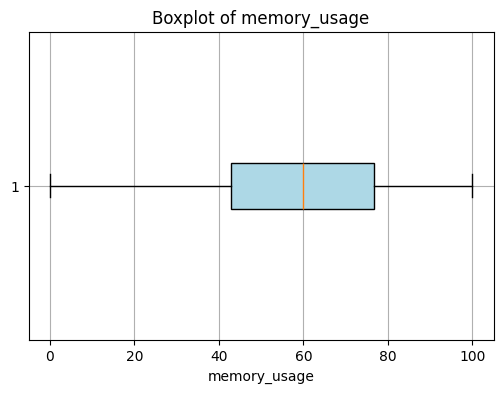

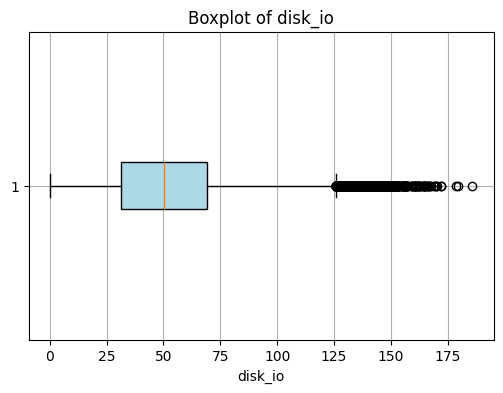

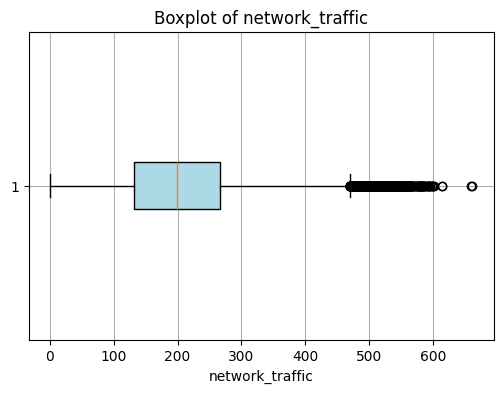

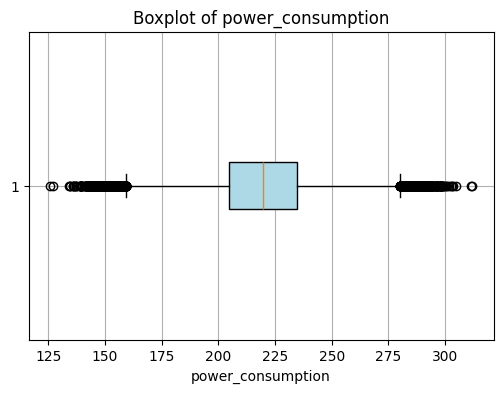

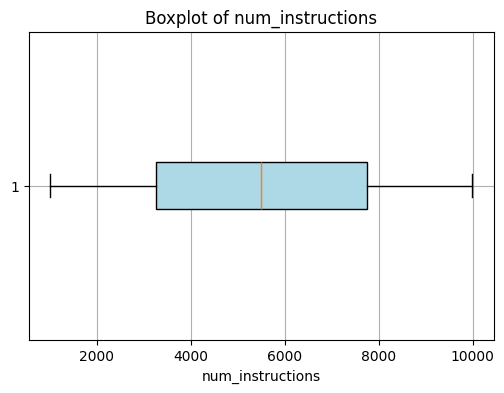

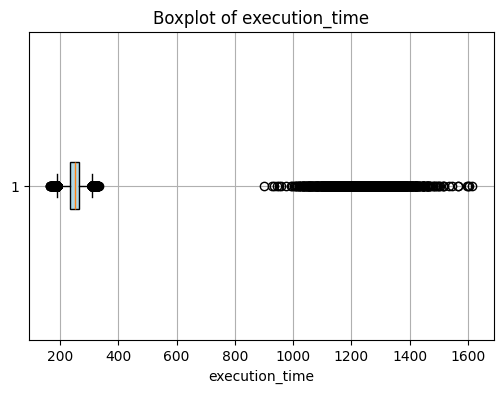

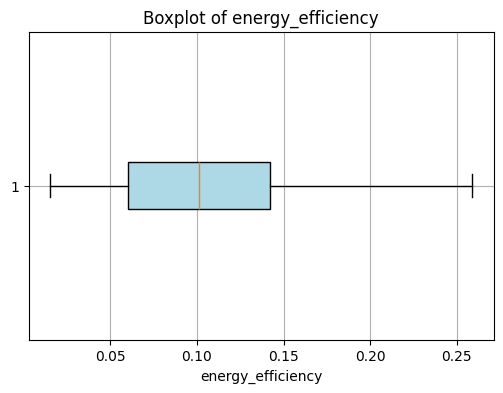

In [121]:
# Create boxplots for each numerical column

for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [122]:
def bounds(col):
  q1 = np.percentile(col,25)
  q3 = np.percentile(col,75)
  iqr = q3 - q1
  ub = q3 + 1.5*iqr
  lb = q1 - 1.5*iqr
  t1 = np.where(col>=ub)
  t2 = np.where(col<=lb)
  val1 = (np.where((col>=q3) | (col<=ub)))[0]
  val2 = (np.where((col<=q1) | (col>=lb)))[0]
  uw = col[val1]
  lw = col[val2]
  col[t1] = uw[0]
  col[t2] = lw[0]
  return col

for col in num_cols:
      df[col] = bounds(df[col])

C:\Users\RDX\AppData\Local\Temp\ipykernel_27564\622434660.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[t1] = uw[0]
C:\Users\RDX\AppData\Local\Temp\ipykernel_27564\622434660.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[t1] = uw[0]
C:\Users\RDX\AppData\Local\Temp\ipykernel_27564\622434660.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[t2] = lw[0]
C:\Users\RDX\AppData\Local\Temp\ipykernel_27564\622434660.

# Replaced outliers by the highest value between Q3 and upper bound for outliers > upper bound
                                                        and
# Replaced outliers by the lowest value between Q1 and lower bound for outliers < lower bound

In [123]:

df['task_type'] = df['task_type'].str.lower().str.strip()


In [124]:

df['task_type'] = df['task_type'].replace({
    'compuutte': 'compute',
    'network': 'network',   # to handle 'NetWork'
    'io': 'io'
})


In [125]:
df['task_type'].unique()

array(['io', 'network', 'compute'], dtype=object)

In [126]:
df['task_priority'] = df['task_priority'].str.lower().str.strip()


In [127]:
df['task_priority'].unique()

array(['medium', 'low', 'high', 'med'], dtype=object)

In [128]:
df['task_priority'] = df['task_priority'].replace({
    'med': 'medium',
})

In [129]:
df['task_priority'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [130]:
df['task_status'] = df['task_status'].str.lower().str.strip()


In [131]:
df['task_status'].unique()

array(['completed', 'running', 'waiting'], dtype=object)

In [132]:
df['task_status'].value_counts()


task_status
running      227792
completed     61000
waiting       16208
Name: count, dtype: int64

In [133]:
df['task_status'].value_counts(normalize=True)


task_status
running      0.746859
completed    0.200000
waiting      0.053141
Name: proportion, dtype: float64

# EDA

1. Univariate Analysis

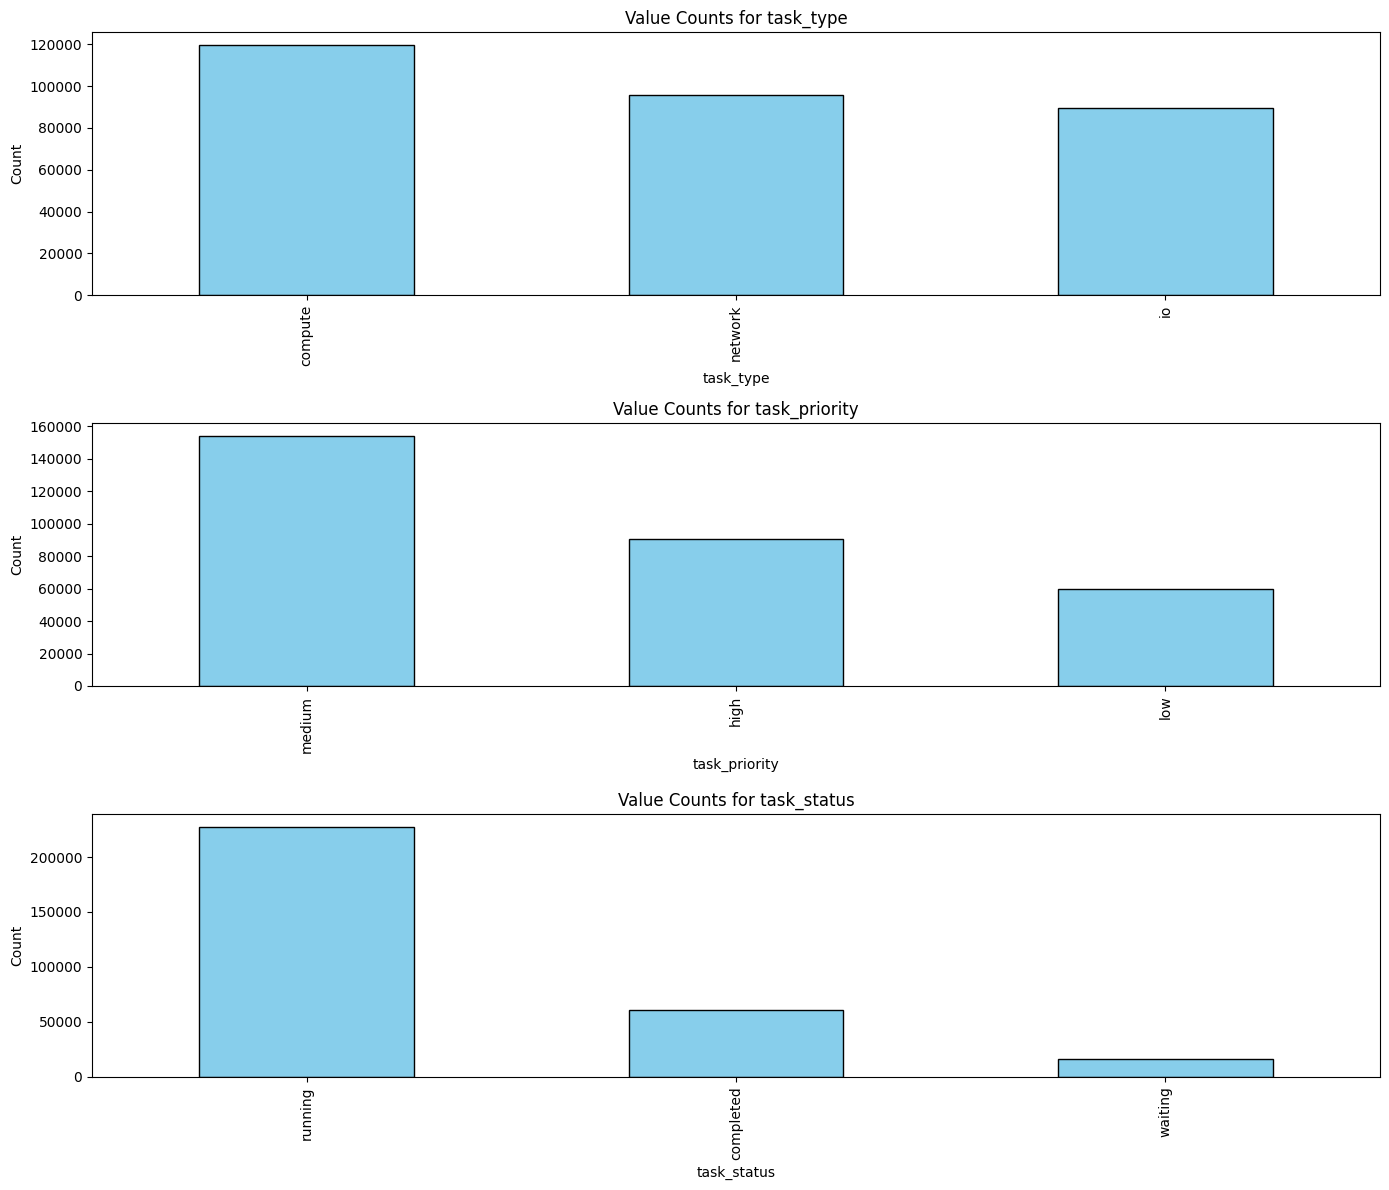

In [134]:

plt.figure(figsize=(14, 4 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 1, i + 1)
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

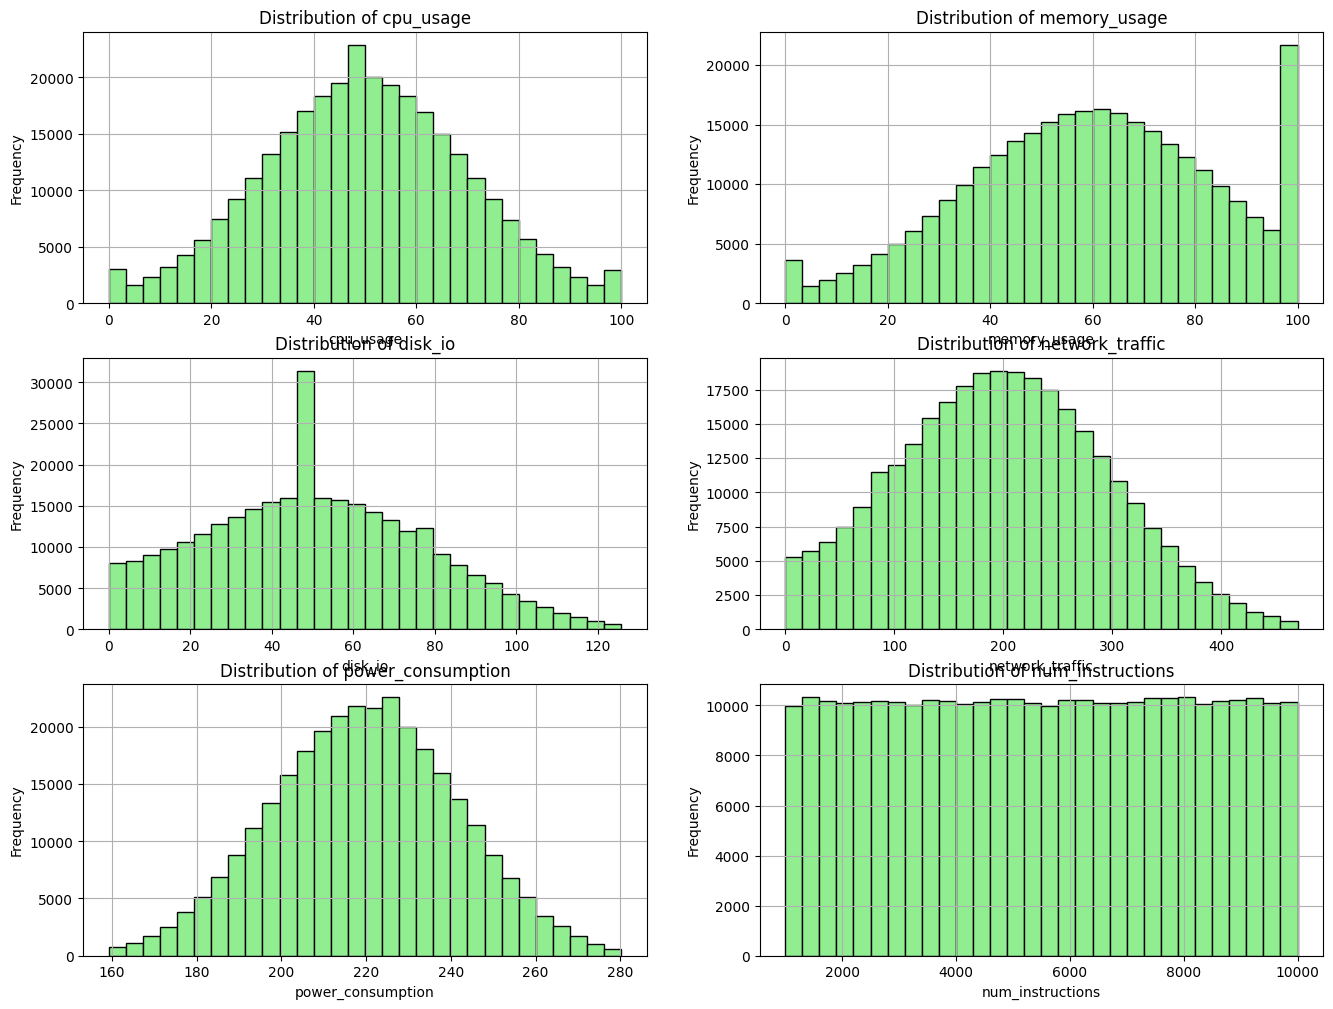

In [136]:

plt.figure(figsize=(16, 12))  # Adjust as needed

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)  # 3 rows x 2 columns grid
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    print()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'CPU usage vs Memory usage')

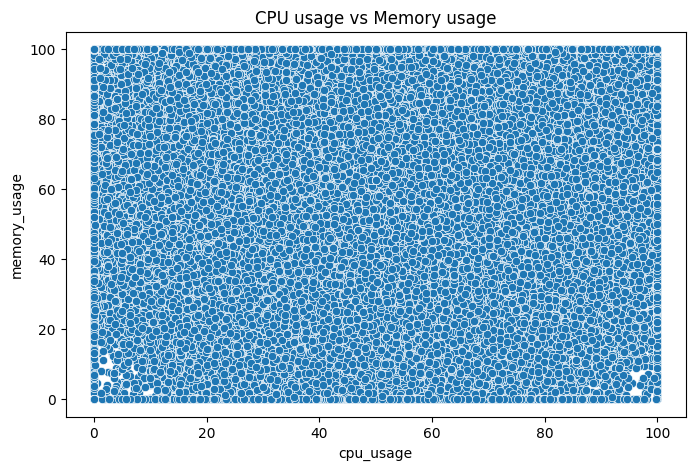

In [137]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='cpu_usage', y='memory_usage')
plt.title('CPU usage vs Memory usage')

Text(0.5, 1.0, 'CPU usage vs Memory usage')

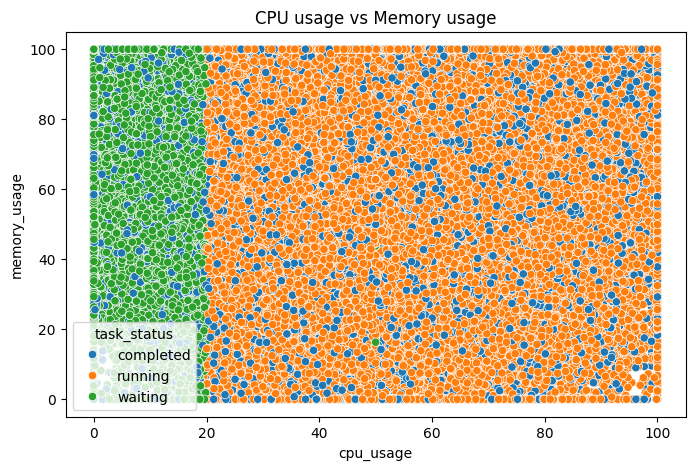

In [138]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='cpu_usage', y='memory_usage', hue = 'task_status')
plt.title('CPU usage vs Memory usage')

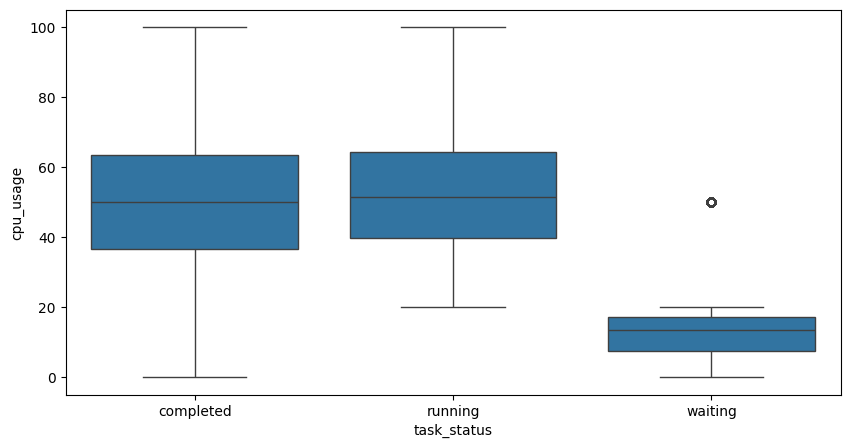

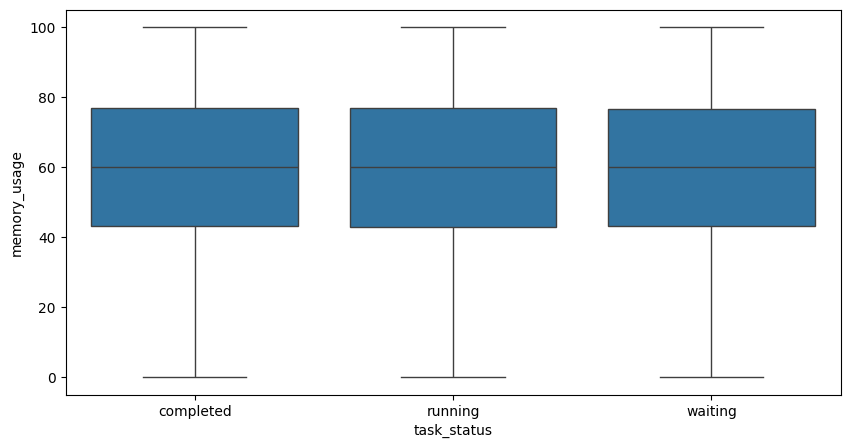

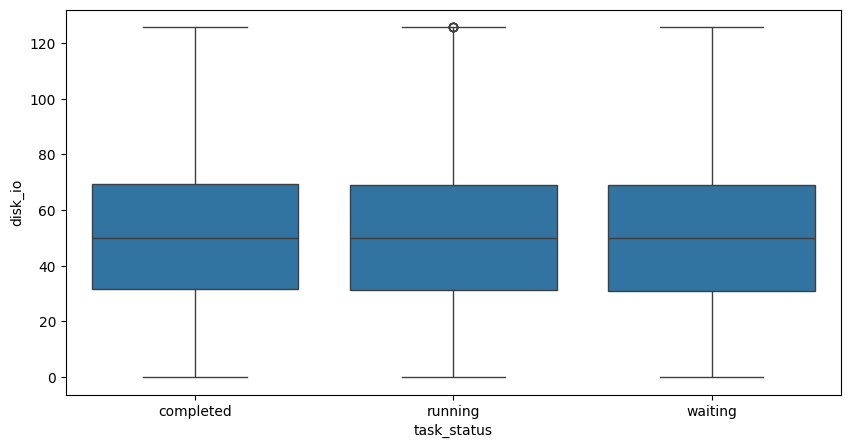

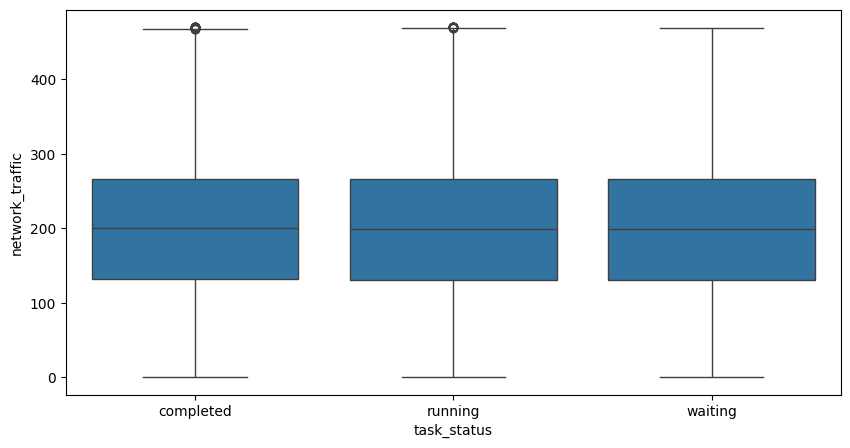

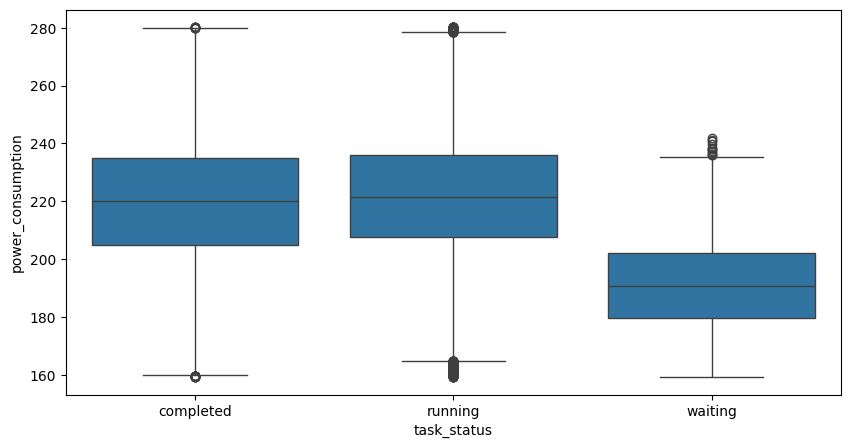

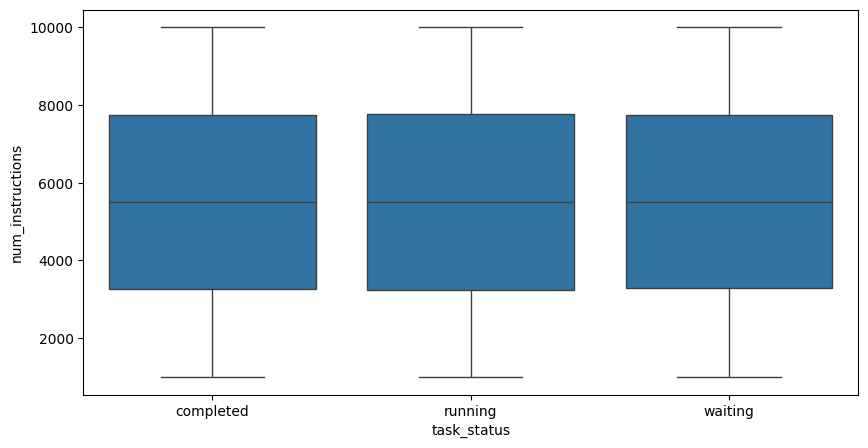

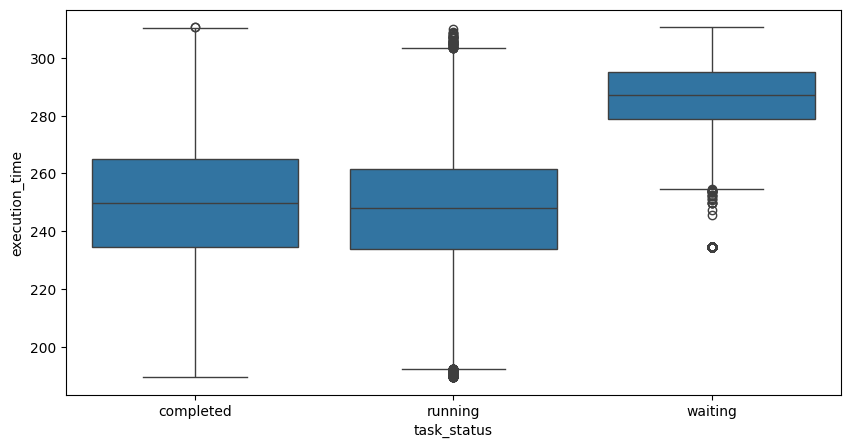

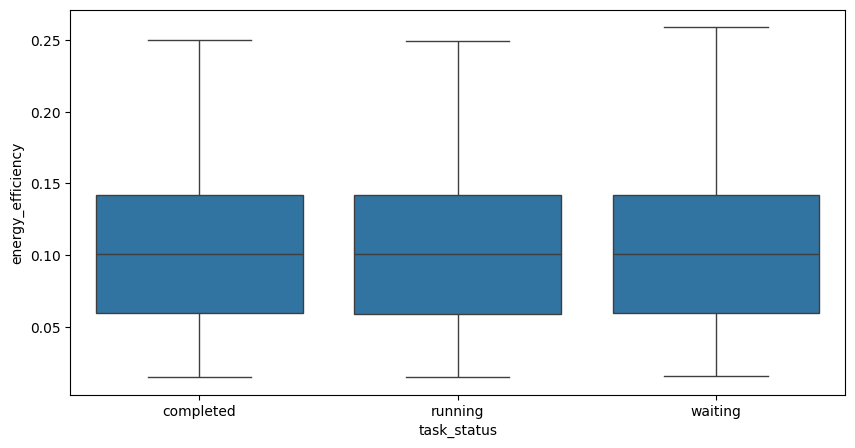

In [139]:
for col in num_cols:
    
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='task_status', y=col)

In [161]:
import pandas as pd

# Load the data
df = pd.read_csv("cloud_optimizer.csv")

# Drop irrelevant columns
df.drop(columns=["vm_id", "timestamp"], inplace=True)

# Handle missing values
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["task_type", "task_priority", "task_status"], drop_first=True)

# Fix the typo if present
if "task_type_compuutte" in df_encoded.columns and "task_type_compute" in df_encoded.columns:
    df_encoded["task_type_compute"] = df_encoded["task_type_compute"] | df_encoded["task_type_compuutte"]
    df_encoded.drop(columns=["task_type_compuutte"], inplace=True)


C:\Users\RDX\AppData\Local\Temp\ipykernel_27564\2744349142.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\RDX\AppData\Local\Temp\ipykernel_27564\2744349142.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

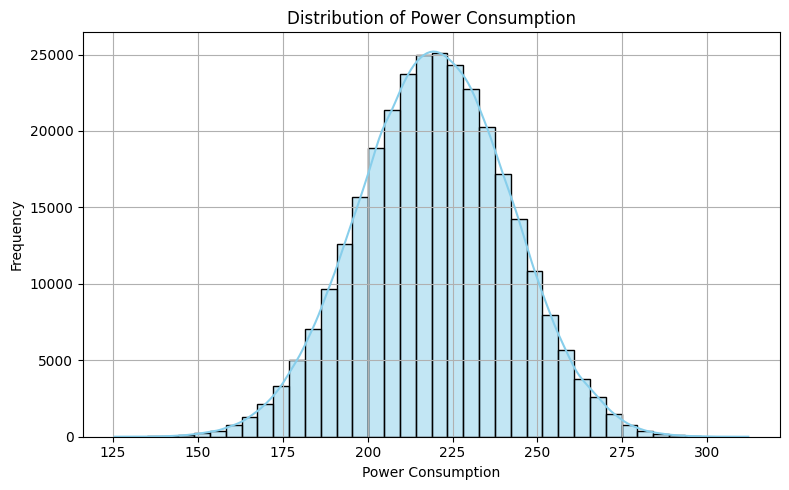

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_encoded["power_consumption"], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Power Consumption")
plt.xlabel("Power Consumption")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [163]:
# this shows the distribution of power consumption which is almost symmetrical

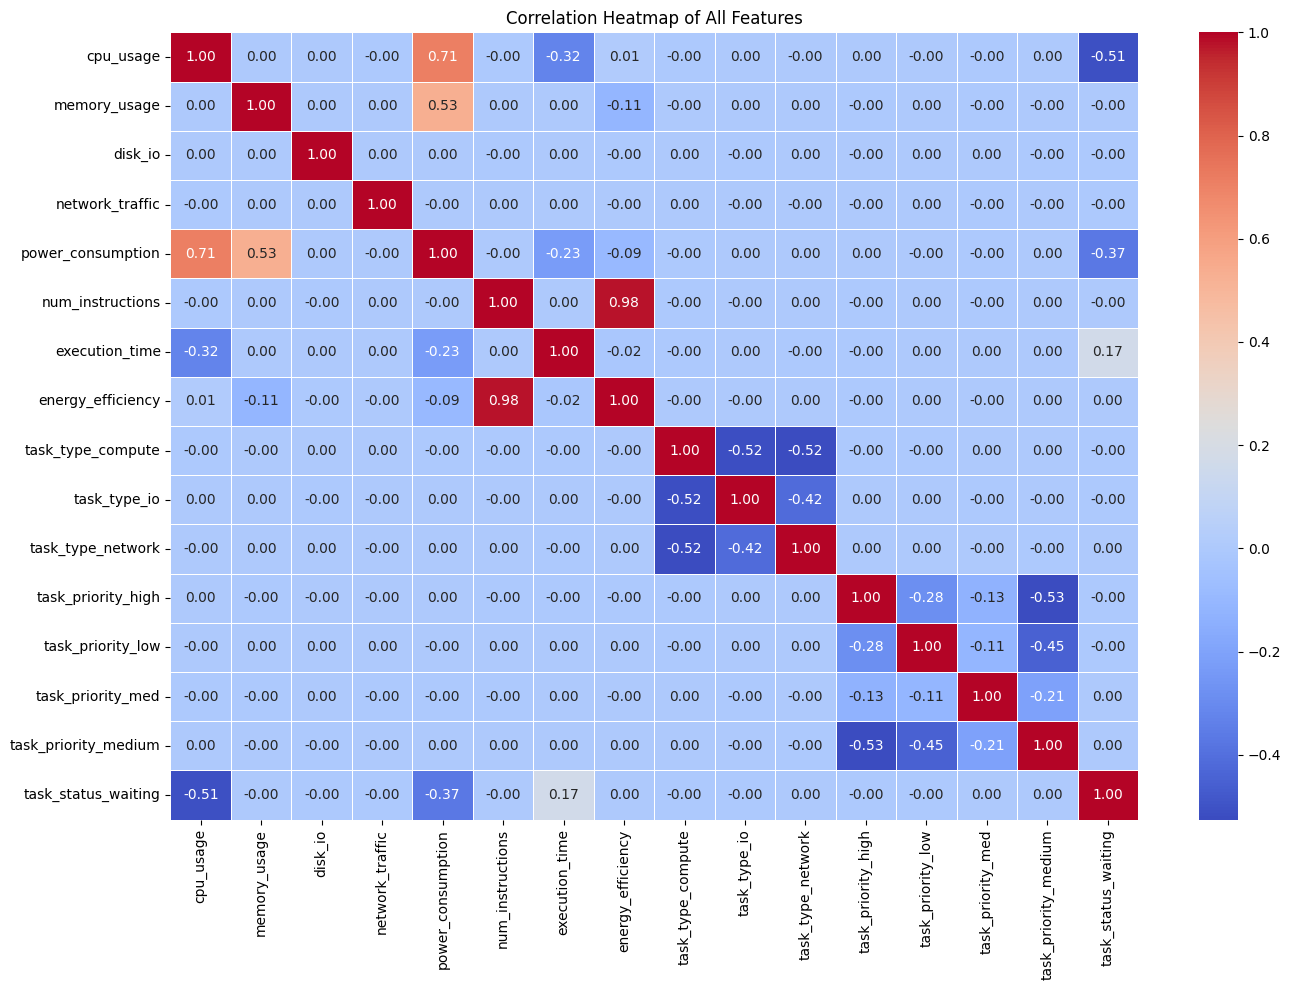

In [164]:
plt.figure(figsize=(14, 10))
corr = df_encoded.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.show()


# Inferential Statistics

One way anova test

In [140]:
from scipy.stats import f_oneway, chi2_contingency

target_col = 'task_status'

print("\n=== One-Way ANOVA Results ===\n")

for col in num_cols:
    groups = [df[df[target_col] == status][col] for status in df[target_col].unique()]
    f_stat, p_value = f_oneway(*groups)

    print(f'{col} vs {target_col}')
    print(f'F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}')

    if p_value < 0.05:
        print('Significant difference found.\n')
    else:
        print('No significant difference.\n')



=== One-Way ANOVA Results ===

cpu_usage vs task_status
F-statistic: 40733.8801, p-value: 0.0000
Significant difference found.

memory_usage vs task_status
F-statistic: 0.0328, p-value: 0.9677
No significant difference.

disk_io vs task_status
F-statistic: 1.4012, p-value: 0.2463
No significant difference.

network_traffic vs task_status
F-statistic: 1.0406, p-value: 0.3533
No significant difference.

power_consumption vs task_status
F-statistic: 16263.4837, p-value: 0.0000
Significant difference found.

num_instructions vs task_status
F-statistic: 0.0846, p-value: 0.9189
No significant difference.

execution_time vs task_status
F-statistic: 27639.1970, p-value: 0.0000
Significant difference found.

energy_efficiency vs task_status
F-statistic: 0.8783, p-value: 0.4155
No significant difference.



Chi square degree of association

In [141]:
print("\n=== Chi-Square Test Results ===\n")

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f'{col} vs {target_col}')
    print(f'Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}')

    if p < 0.05:
        print('Significant association found.\n')
    else:
        print('No significant association.\n')



=== Chi-Square Test Results ===

task_type vs task_status
Chi-Square Statistic: 8.9041, p-value: 0.0635
No significant association.

task_priority vs task_status
Chi-Square Statistic: 4.2693, p-value: 0.3708
No significant association.

task_status vs task_status
Chi-Square Statistic: 610000.0000, p-value: 0.0000
Significant association found.



In [142]:
df.describe().round(2)

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency
count,305000.00,305000.00,305000.00,305000.00,305000.00,305000.00,305000.00,305000.00
mean,50.00,59.41,50.84,199.98,219.76,5504.29,249.90,0.10
std,19.68,23.66,26.54,95.29,21.62,2597.62,21.76,0.05
min,0.00,0.00,0.00,0.00,159.28,1000.00,189.63,0.02
25%,36.68,42.97,31.28,131.06,204.83,3256.00,234.61,0.06
50%,50.00,59.93,50.04,198.98,219.95,5506.00,249.84,0.10
75%,63.32,76.82,69.06,266.18,234.71,7754.00,264.85,0.14
max,100.00,100.00,125.74,469.86,280.20,9999.00,310.60,0.26


# Heatmap

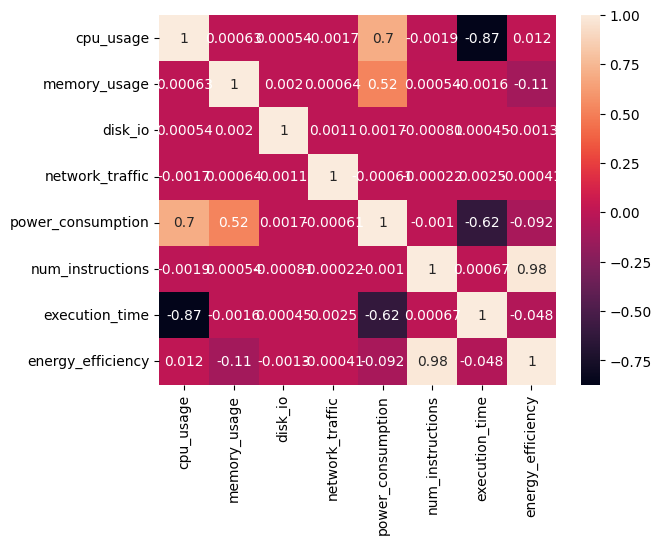

In [143]:
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

In [144]:
task_type_dummy = pd.get_dummies(df.task_type, drop_first=True, prefix='Type').astype(int)
df.drop('task_type',axis=1,inplace=True)

task_priority_dummy = pd.get_dummies(df.task_priority, drop_first=True, prefix='Priority').astype(int)
df.drop('task_priority', axis =1, inplace = True)

In [145]:
df = pd.concat([df,task_type_dummy,task_priority_dummy], axis=1)

In [146]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,Type_io,Type_network,Priority_low,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,completed,1,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,running,0,1,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,running,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,running,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,running,1,0,1,0


In [147]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Define the order explicitly
encoder = OrdinalEncoder(categories=[['completed', 'running', 'waiting']])
df['task_status'] = encoder.fit_transform(df[['task_status']]).astype(int) + 1  # +1 to make completed=1, as it starts with zero


In [148]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,Type_io,Type_network,Priority_low,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,1,1,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,2,0,1,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,2,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,2,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,2,1,0,1,0


In [149]:
df['task_status'].unique()

array([1, 2, 3])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305000 entries, 0 to 304999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cpu_usage          305000 non-null  float64
 1   memory_usage       305000 non-null  float64
 2   disk_io            305000 non-null  float64
 3   network_traffic    305000 non-null  float64
 4   power_consumption  305000 non-null  float64
 5   num_instructions   305000 non-null  int64  
 6   execution_time     305000 non-null  float64
 7   energy_efficiency  305000 non-null  float64
 8   task_status        305000 non-null  int64  
 9   Type_io            305000 non-null  int64  
 10  Type_network       305000 non-null  int64  
 11  Priority_low       305000 non-null  int64  
 12  Priority_medium    305000 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 30.3 MB


# VIF - Variance Inflation Factor

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()

vif_data['Columns'] = df.columns

res = []

for ctr in range(df.shape[1]):
    res.append(variance_inflation_factor(df.values,ctr))

vif_data['VIF'] = res

In [152]:
vif_data

,Columns,VIF
0,cpu_usage,41.208492
1,memory_usage,15.691221
2,disk_io,4.661968
3,network_traffic,5.394948
4,power_consumption,353.616329
5,num_instructions,236.114524
6,execution_time,141.106155
7,energy_efficiency,228.925224
8,task_status,16.519110
9,Type_io,1.746217


In [153]:
 'num_instructions', 'energy_efficiency'

('num_instructions', 'energy_efficiency')

In [154]:
df.head()

,cpu_usage,memory_usage,disk_io,network_traffic,power_consumption,num_instructions,execution_time,energy_efficiency,task_status,Type_io,Type_network,Priority_low,Priority_medium
0,65.891148,44.970416,79.147536,81.593031,224.998620,8835,234.450881,0.167,1,1,0,0,1
1,55.985852,74.130633,49.122988,445.004751,229.548031,1007,246.101195,0.018,2,0,1,0,1
2,34.106867,79.773003,97.197016,344.983795,214.588040,1731,271.497975,0.030,2,0,0,0,1
3,34.138826,61.733021,2.815393,222.970408,216.305035,8215,280.613650,0.135,2,0,0,0,1
4,53.851100,31.755124,50.040677,132.854074,209.353003,5472,249.427367,0.105,2,1,0,1,0


# Train Test Split

In [165]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop("power_consumption", axis=1)
y = df_encoded["power_consumption"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Linear Regression Model

In [169]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

In [167]:
y_pred_lr

array([215.28649128, 221.35833788, 200.97440389, ..., 211.41102685,
       197.93711862, 243.8418707 ], shape=(61000,))

In [174]:
import statsmodels.api as sm
import pandas as pd

# Make sure all columns in X_train are numeric and retain DataFrame structure
X_train_sm = sm.add_constant(X_train.astype(float))  # add intercept
y_train_sm = y_train.astype(float)  # ensure float

# Fit the model with column names preserved
ols_model = sm.OLS(y_train_sm, X_train_sm).fit()

# Show full summary with feature names
print(ols_model.summary())




                            OLS Regression Results                            
Dep. Variable:      power_consumption   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 1.096e+05
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:38:36   Log-Likelihood:            -8.5253e+05
No. Observations:              244000   AIC:                         1.705e+06
Df Residuals:                  243984   BIC:                         1.705e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  162.7552 

In [176]:
# this model explains 87.1% of variation in the dataset

In [177]:
# i.e. accuracy is 87.1%

In [181]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [183]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [184]:
xgb_model.feature_importances_


array([6.2433648e-01, 2.4090415e-01, 6.8966747e-04, 7.2567875e-04,
       3.1991392e-02, 1.7238168e-02, 3.4575392e-02, 5.8230618e-04,
       7.6324784e-04, 2.6817375e-04, 9.5703627e-04, 5.6948309e-04,
       2.6959428e-04, 1.0273599e-03, 4.5101799e-02], dtype=float32)

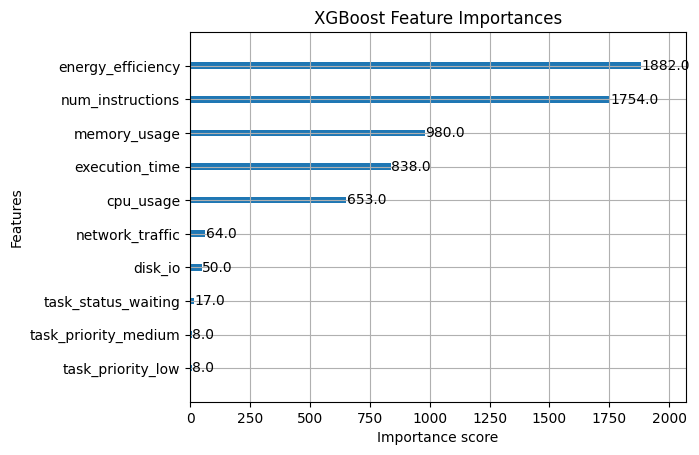

In [185]:
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10)
plt.title("XGBoost Feature Importances")
plt.show()


# Evaluation Metrics

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²   :", r2_score(y_true, y_pred))
    print("-" * 30)

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
# evaluate_model("XGBoost", y_test, y_pred_xgb)  # Uncomment if used


🔍 Linear Regression
MAE : 6.234735099224358
RMSE: 7.950593405662793
R²   : 0.8711929358964801
------------------------------
🔍 Random Forest
MAE : 5.907763062542304
RMSE: 7.771744264496038
R²   : 0.8769228032954647
------------------------------


# Conclusion

Random Forest outperformed Linear Regression on all metrics, capturing non-linear patterns in the data.
- Top contributing features included CPU usage, memory usage, and instruction count.
- The target variable (power consumption) showed moderate skewness and some correlation with execution time and instruction volume.